# Installation and Controls

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Mevcut dizindeki dosyaları listele
files = os.listdir('.')
print(files)

['.config', 'drive', 'model1.png', 'save_models', 'sample_data']


In [ ]:
!pip install -q keras
!pip install -q tensorflow

!pip install keras.utils

In [ ]:
import numpy as np
import pandas as pd
import os
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


60000
60000
10000
10000


# Visualizing samples from data

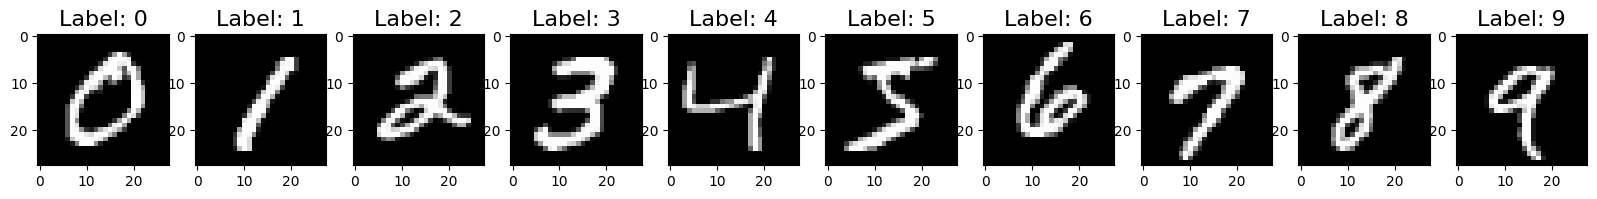

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Normalization, Reshape and Label Encoding
**Normalization**
* We perform a grayscale normalization to reduce the effect of illumination's differences.
* If we perform normalization, CNN works faster.

**Reshape**
* Train and test images (28 x 28)
* We reshape all data to 28x28x1 3D matrices.
* Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

**Label Encoding**

Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
img_rows, img_cols = 28,28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
y_test.shape

(10000, 10)

# Create Model - Fully Connected Neural Network

In [ ]:
# create model
model = Sequential()
# Creating layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

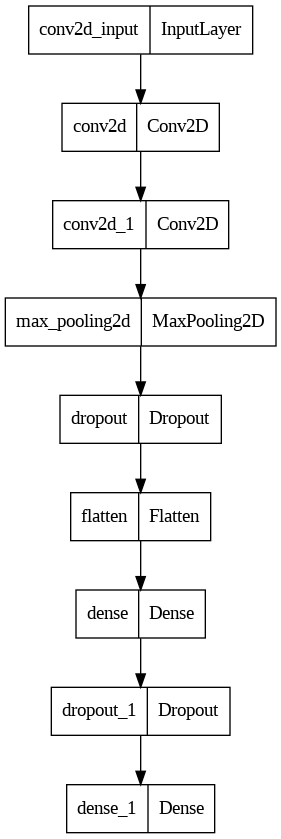

In [ ]:
plot_model(model, to_file='model1.png')

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adam(),
             metrics = ['accuracy'])

# Training

**Epochs (Epoklar):** Bir epok, eğitim veri setinin tamamının, modelin üzerinden geçirilmesi anlamına gelir. Bir epok, eğitim sürecinin bir tam turunu temsil eder. Her bir epok, tüm eğitim veri setinin model tarafından görüldüğü ve modelin güncellendiği bir dönemdir. Örneğin, 10 epoklu bir eğitim süreci, eğitim veri setinin 10 defa model tarafından kullanıldığı anlamına gelir.

**Batch Size (Grup Boyutu):** Batch size, her bir eğitim adımında aynı anda kullanılan örnek sayısını ifade eder. Model eğitilirken veri seti genellikle küçük gruplara (batch) ayrılır ve her bir grup, belirli sayıda örnek içerir. Bu gruplar, ağın güncellenmesi için kullanılır. Örneğin, bir batch size 32 olan bir eğitimde, her adımda 32 örnek ağı güncellemek için kullanılır.

**İterasyon Sayısı (Iteration):** İterasyon, bir epoch içinde gerçekleşen güncelleme adımlarının sayısını ifade eder. Her bir iterasyon, bir batch'ın modele gösterilmesi, kaybın hesaplanması ve modelin güncellenmesi sürecidir. Örneğin, bir epokta 1000 örnek ve 32'lik bir batch size varsa, her bir epokda 31 iterasyon gerçekleşir (1000 / 32 ≈ 31.25, bu da 31 tam iterasyon anlamına gelir).

In [ ]:
batch_size = 64
num_classes = 10
epochs = 12
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
938/938 [==============================] - 10s 10ms/step - loss: 0.0625 - accuracy: 0.9817 - val_loss: 0.0507 - val_accuracy: 0.9891
Epoch 2/12
938/938 [==============================] - 8s 8ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 3/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0459 - accuracy: 0.9864 - val_loss: 0.0423 - val_accuracy: 0.9900
Epoch 4/12
938/938 [==============================] - 7s 7ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0467 - val_accuracy: 0.9888
Epoch 5/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0493 - val_accuracy: 0.9871
Epoch 6/12
938/938 [==============================] - 7s 7ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0415 - val_accuracy: 0.9900
Epoch 7/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0387 - accuracy: 0.9888 - val_loss: 0.0391 - val_accuracy: 0.9916
Epoc

In [ ]:
model_test = model.save('save_models/mnist_model.h5')

# Evaluate

In [ ]:
#model.evaluate() yöntemi genellikle bir ölçüm metriği olan kayıp (loss) ve doğruluk (accuracy) gibi değerleri döndürür
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.04939493536949158
Test Accuracy: 0.9891999959945679


In [ ]:
test_image = x_test[100]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

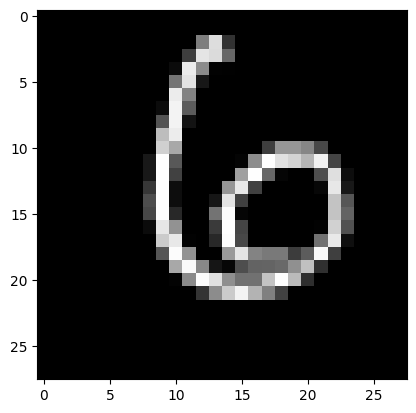

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

# TRY

1/1 [==============================] - 0s 18ms/step


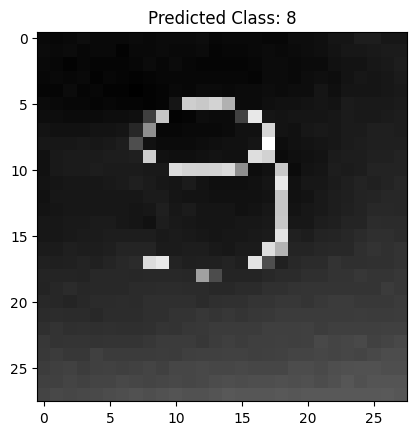

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_path =  r'/gdrive/My Drive/Mnist/9.jpg'
img = cv2.imread(file_path , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0
# Görüntüyü normalize oldu


input_data = np.array([img])
input_data = input_data.reshape(input_data.shape[0], 28, 28, 1)  # Veri şeklini modelinizin beklediği şekle dönüştürüldü

# # Tahmin yapın
prediction = model.predict(input_data)
predicted_class = np.argmax(prediction)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()
